In this ipython notebook, i will mark down my leaning records on Dropout and Functional APIs in keras, so i will use Dropout in Functional keras API

In [20]:
import tensorflow as tf
tf.__version__

'2.0.0-rc0'

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()

In [23]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist

In [24]:
train_images.shape

(60000, 28, 28)

In [25]:
train_labels.shape

(60000,)

In [26]:
train_images=train_images/255.0
test_images=test_images/255.0

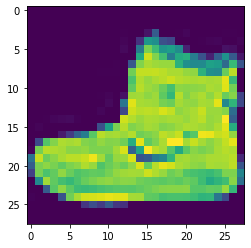

In [27]:
plt.imshow(train_images[0])

In [28]:
input=tf.keras.Input(shape=(28,28))

In [29]:
x=tf.keras.layers.Flatten()(input)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(10,activation='softmax')(x)

In [30]:
output=x

In [31]:
model=tf.keras.Model(inputs=input,outputs=output)

In [32]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [33]:
history=model.fit(train_images,train_labels,epochs=10, validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.7485 - acc: 0.7292 - val_loss: 0.4914 - val_acc: 0.8255
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5425 - acc: 0.8057 - val_loss: 0.4297 - val_acc: 0.8423
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5031 - acc: 0.8199 - val_loss: 0.4183 - val_acc: 0.8463
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4837 - acc: 0.8265 - val_loss: 0.4186 - val_acc: 0.8505
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4634 - acc: 0.8346 - val_loss: 0.3959 - val_acc: 0.8545
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4539 - acc: 0.8367 - val_loss: 0.4018 - val_acc: 0.8544
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4445 - acc: 0.8390 - val_loss: 0.

In [34]:
history.history

{'loss': [0.7485390150705973,
  0.5424628270069758,
  0.5030803488850594,
  0.48370148507754007,
  0.46337763722340264,
  0.453918168592453,
  0.4444810895760854,
  0.4355124579548836,
  0.4300861352523168,
  0.4288589136819045],
 'acc': [0.7291667,
  0.8057333,
  0.81986666,
  0.8265,
  0.83458334,
  0.8367,
  0.839,
  0.84313333,
  0.84503335,
  0.8458],
 'val_loss': [0.4914390033721924,
  0.42965767126083376,
  0.4182694656133652,
  0.41864750826358793,
  0.39585318219661714,
  0.4018241509914398,
  0.3903080561876297,
  0.3803651429414749,
  0.3780095517873764,
  0.3816034492492676],
 'val_acc': [0.8255,
  0.8423,
  0.8463,
  0.8505,
  0.8545,
  0.8544,
  0.8596,
  0.8598,
  0.8655,
  0.8617]}

In [35]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

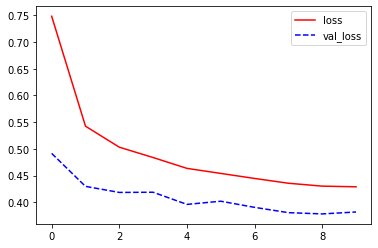

In [37]:
plt.plot(history.epoch,history.history['loss'],'r',label='loss')
plt.plot(history.epoch,history.history['val_loss'],'b--',label='val_loss')
plt.legend()

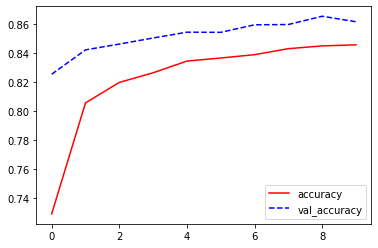

In [40]:
plt.plot(history.epoch,history.history['acc'],'r',label='accuracy')
plt.plot(history.epoch,history.history['val_acc'],'b--',label='val_accuracy')
plt.legend()